<font size="6" color="purple"> **TALLER DE MÉTODOS ESTOCÁSTICOS - EJERCICIO 6.**

**GEOESTADISTICA**


*   ALUMNO: EDWIN GILBERTO AMAYA REYES
*   PROFESOR LEONARDO DAVID DONADO GARZÓN

<font size="5.5" >  **GENERALIDADES**

Considerando el articulo "Numerical Comparison of Network Design Algorithms for Regionalized Variable" escrito por Carrera & Szidarovszky 1985, se busca reproducir cada uno de los algoritmos expuestos een la busqueda de la minimizacion de la varianza en las estimaciones espaciales kriging.

<font size="5"> **0. Grafico del problema**

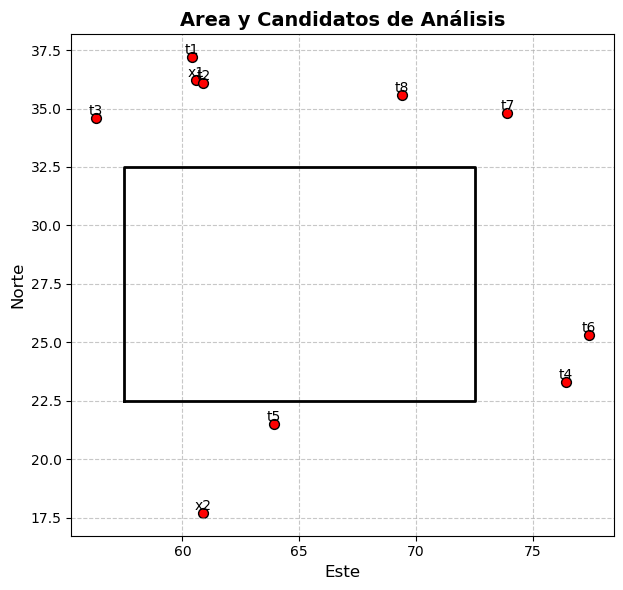

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las coordenadas de las esquinas del rectángulo
rectangulo_coords = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5)]

# Separar las coordenadas x e y de las esquinas
x_esquinas = [coord[0] for coord in rectangulo_coords]
y_esquinas = [coord[1] for coord in rectangulo_coords]

# Definir un diccionario con los puntos de medición y sus coordenadas
puntos_medicion = {
   'x1': (60.6, 36.2), 'x2': (60.9, 17.7), 't1': (60.4, 37.2), 't2': (60.9, 36.1),
   't3': (56.3, 34.6), 't4': (76.4, 23.3), 't5': (63.9, 21.5), 't6': (77.4, 25.3),
   't7': (73.9, 34.8), 't8': (69.4, 35.6)
}

# Obtener las coordenadas x e y de los puntos de medición
x_mediciones = [coord[0] for coord in puntos_medicion.values()]
y_mediciones = [coord[1] for coord in puntos_medicion.values()]

# Crear una nueva figura
fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura

# Graficar el rectángulo
ax.plot(x_esquinas + [x_esquinas[0]], y_esquinas + [y_esquinas[0]], 'k-', linewidth=2)

# Graficar los puntos de medición
ax.scatter(x_mediciones, y_mediciones, s=50, c='r', marker='o', edgecolors='k')  # Estilo de puntos

# Etiquetar los puntos de medición
for etiqueta, (x, y) in puntos_medicion.items():
   ax.text(x, y, etiqueta, fontsize=10, ha='center', va='bottom')

# Configurar los ejes y el título
ax.set_xlabel('Este', fontsize=12)
ax.set_ylabel('Norte', fontsize=12)
ax.set_title('Area y Candidatos de Análisis', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7)  # Estilo de la cuadrícula
ax.set_aspect('equal')  # Aspecto de la gráfica

# Ajustar los márgenes para una mejor visualización
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<font size="5"> **1. Algoritmo de enumeración Total**

El conjunto óptimo de puntos adicionales es: ((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (63.9, 21.5))
La varianza de kriging óptima es: 0.20940984503881513


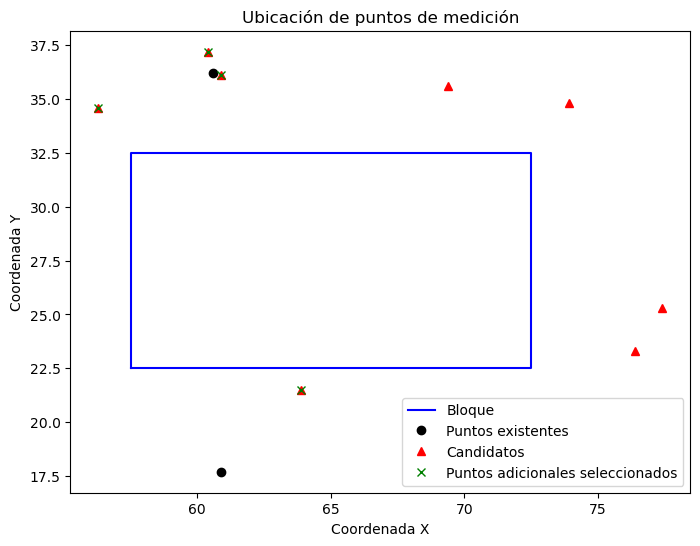

In [21]:
#ESTE ES#
from itertools import combinations
import numpy as np
import math
import matplotlib.pyplot as plt

def variogram(h):
    """Función de variograma dada en el documento"""
    if abs(h) <= 40:
        return 0.18 * abs(h)
    else:
        return 0.18 * 40

def dist(p1, p2):
    """Calcula la distancia euclidiana entre dos puntos en 2D"""
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def compute_kriging_var(X, xnew, V, variogram):
    """Función para calcular la varianza de kriging"""
    n = len(X)
    yvi = [1/abs(sum([x[0]-v[0] for v in V])) * sum([variogram(dist(x, xnew_j)) for xnew_j in xnew]) for x in X]
    
    gamma = np.zeros((n+len(xnew), n+len(xnew)))
    gamma[:n, :n] = [[variogram(dist(xi, xj)) for xj in X] for xi in X]
    gamma[n:, n:] = [[variogram(dist(xi, xj)) for xj in xnew] for xi in xnew]
    gamma[:n, n:] = np.transpose([yvi])
    gamma[n:, :n] = yvi
    rhs = np.concatenate((np.ones(n), np.zeros(len(xnew))))
    
    weights = np.linalg.solve(gamma, rhs)
    
    kriging_var = sum([w*yvi[i] for i,w in enumerate(weights[:n])]) + weights[n]
    
    return kriging_var

def total_enumeration(X, candidates, n, V):
    """Algoritmo de enumeración total"""
    combos = combinations(candidates, n)
    best_combo = None
    min_var = np.inf
    for combo in combos:
        var = compute_kriging_var(X, combo, V, variogram)
        if var < min_var:
            min_var = var
            best_combo = combo
    return best_combo, min_var

# Datos del ejemplo numérico
X = [(60.6, 36.2), (60.9, 17.7)]  # Puntos existentes
candidates = [(60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3), 
              (63.9, 21.5), (77.4, 25.3), (73.9, 34.8), (69.4, 35.6)]  # Candidatos
n = 4  # Número de puntos adicionales a seleccionar
V = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5)]  # Bloque

# Ejecutar el algoritmo de enumeración total
best_combo, min_var = total_enumeration(X, candidates, n, V)
print(f"El conjunto óptimo de puntos adicionales es: {best_combo}")
print(f"La varianza de kriging óptima es: {min_var}")

# Visualización gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el bloque V
x_vertices = [V[0][0], V[1][0], V[1][0], V[2][0], V[2][0], V[3][0], V[3][0], V[0][0], V[0][0]]
y_vertices = [V[0][1], V[0][1], V[1][1], V[1][1], V[2][1], V[2][1], V[3][1], V[3][1], V[0][1]]
ax.plot(x_vertices, y_vertices, 'b-', label='Bloque')

# Graficar los puntos existentes
x_existing, y_existing = zip(*X)
ax.plot(x_existing, y_existing, 'ko', label='Puntos existentes')

# Graficar los candidatos
x_candidates, y_candidates = zip(*candidates)
ax.plot(x_candidates, y_candidates, 'r^', label='Candidatos')

# Graficar los puntos adicionales seleccionados
x_selected, y_selected = zip(*best_combo)
ax.plot(x_selected, y_selected, 'gx', label='Puntos adicionales seleccionados')

ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Ubicación de puntos de medición')
ax.legend()
plt.show()

<font size="5"> **2. Algoritmo de ramificación y acotamiento**

El conjunto óptimo de puntos adicionales es: [(76.4, 23.3), (60.9, 36.1), (60.4, 37.2), (56.3, 34.6)]
La varianza de kriging óptima es: 0.2615571454866691


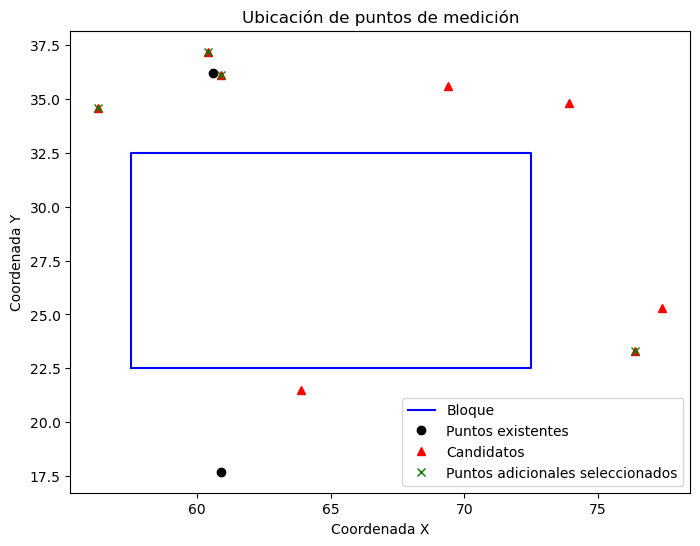

In [22]:
from itertools import combinations
import numpy as np
import math
import matplotlib.pyplot as plt

def variogram(h):
    """Función de variograma dada en el documento"""
    if abs(h) <= 40:
        return 0.18 * abs(h)
    else:
        return 0.18 * 40

def dist(p1, p2):
    """Calcula la distancia euclidiana entre dos puntos en 2D"""
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def compute_kriging_var(X, xnew, V, variogram):
    """Función para calcular la varianza de kriging"""
    n = len(X)
    yvi = [1/abs(sum([x[0]-v[0] for v in V])) * sum([variogram(dist(x, xnew_j)) for xnew_j in xnew]) for x in X]
    
    gamma = np.zeros((n+len(xnew), n+len(xnew)))
    gamma[:n, :n] = [[variogram(dist(xi, xj)) for xj in X] for xi in X]
    gamma[n:, n:] = [[variogram(dist(xi, xj)) for xj in xnew] for xi in xnew]
    gamma[:n, n:] = np.transpose([yvi])
    gamma[n:, :n] = yvi
    rhs = np.concatenate((np.ones(n), np.zeros(len(xnew))))
    
    weights = np.linalg.solve(gamma, rhs)
    
    kriging_var = sum([w*yvi[i] for i,w in enumerate(weights[:n])]) + weights[n]
    
    return kriging_var

def branch_and_bound(X, candidates, n, V):
    """Algoritmo de Branch and Bound"""
    N = len(candidates)
    best_combo = set(candidates[:n])
    min_var = compute_kriging_var(X, best_combo, V, variogram)
    
    def explore(combo, remaining):
        nonlocal best_combo, min_var
        
        if len(combo) == n:
            var = compute_kriging_var(X, combo, V, variogram)
            if var < min_var:
                min_var = var
                best_combo = combo.copy()
            return
        
        if len(remaining) == 0:
            return
        
        var_lower_bound = compute_kriging_var(X, combo.union(remaining), V, variogram)
        if var_lower_bound >= min_var:
            return
        
        for i in range(len(remaining)):
            new_combo = combo.copy()
            new_combo.add(remaining[i])
            new_remaining = remaining[i+1:]
            explore(new_combo, new_remaining)
    
    explore(set(), set(candidates))
    return best_combo, min_var

# Datos del ejemplo numérico
X = [(60.6, 36.2), (60.9, 17.7)]  # Puntos existentes
candidates = [(60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3), 
              (63.9, 21.5), (77.4, 25.3), (73.9, 34.8), (69.4, 35.6)]  # Candidatos
n = 4  # Número de puntos adicionales a seleccionar
V = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5)]  # Bloque

# Ejecutar el algoritmo de Branch and Bound
best_combo, min_var = branch_and_bound(X, candidates, n, V)
best_combo = list(best_combo)
print(f"El conjunto óptimo de puntos adicionales es: {best_combo}")
print(f"La varianza de kriging óptima es: {min_var}")

# Visualización gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el bloque V
x_vertices = [V[0][0], V[1][0], V[1][0], V[2][0], V[2][0], V[3][0], V[3][0], V[0][0], V[0][0]]
y_vertices = [V[0][1], V[0][1], V[1][1], V[1][1], V[2][1], V[2][1], V[3][1], V[3][1], V[0][1]]
ax.plot(x_vertices, y_vertices, 'b-', label='Bloque')

# Graficar los puntos existentes
x_existing, y_existing = zip(*X)
ax.plot(x_existing, y_existing, 'ko', label='Puntos existentes')

# Graficar los candidatos
x_candidates, y_candidates = zip(*candidates)
ax.plot(x_candidates, y_candidates, 'r^', label='Candidatos')

# Graficar los puntos adicionales seleccionados
x_selected, y_selected = zip(*best_combo)
ax.plot(x_selected, y_selected, 'gx', label='Puntos adicionales seleccionados')

ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Ubicación de puntos de medición')
ax.legend()
plt.show()

<font size="5"> **3. Algoritmo de inclusión secuencial óptima**

El conjunto óptimo de puntos adicionales es: [(56.3, 34.6), (69.4, 35.6), (77.4, 25.3), (73.9, 34.8)]
La varianza de kriging óptima es: 0.3530385901568924


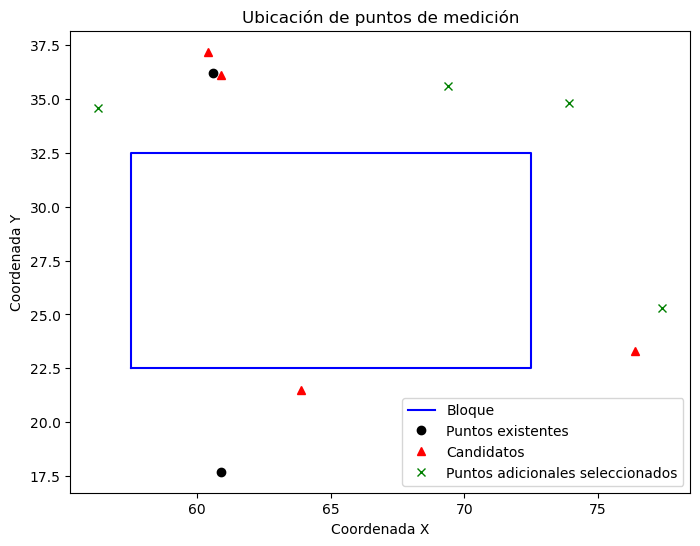

In [25]:
from itertools import combinations
import numpy as np
import math
import matplotlib.pyplot as plt

def variogram(h):
    """Función de variograma dada en el documento"""
    if abs(h) <= 40:
        return 0.18 * abs(h) + 0.01  # Agregar una pequeña constante para estabilizar
    else:
        return 0.18 * 40

def dist(p1, p2):
    """Calcula la distancia euclidiana entre dos puntos en 2D"""
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def compute_kriging_var(X, xnew, V, variogram):
    """Función para calcular la varianza de kriging"""
    n = len(X)
    yvi = [1/abs(sum([x[0]-v[0] for v in V])) * sum([variogram(dist(x, xnew_j)) for xnew_j in xnew]) for x in X]
    
    gamma = np.zeros((n+len(xnew), n+len(xnew)))
    gamma[:n, :n] = [[variogram(dist(xi, xj)) for xj in X] for xi in X]
    gamma[n:, n:] = [[variogram(dist(xi, xj)) for xj in xnew] for xi in xnew]
    gamma[:n, n:] = np.transpose([yvi])
    gamma[n:, :n] = yvi
    rhs = np.concatenate((np.ones(n), np.zeros(len(xnew))))
    
    # Usando numpy.linalg.solve con la opción 'lstsq' para manejar la posible singularidad
    try:
        weights = np.linalg.solve(gamma, rhs)
    except np.linalg.LinAlgError:
        weights = np.linalg.lstsq(gamma, rhs, rcond=None)[0]  # Solución de mínimos cuadrados

    kriging_var = sum([w*yvi[i] for i,w in enumerate(weights[:n])]) + weights[n]
    
    return kriging_var

def sequential_including(X, candidates, n, V):
    """Algoritmo de Inclusión Secuencial Óptima"""
    best_combo = []
    X_current = X.copy()
    
    for _ in range(n):
        min_var = float('inf')
        best_candidate = None
        
        for candidate in candidates:
            var = compute_kriging_var(X_current + best_combo, [candidate], V, variogram)
            if var < min_var:
                min_var = var
                best_candidate = candidate
        
        best_combo.append(best_candidate)
        X_current.append(best_candidate)
        candidates.remove(best_candidate)
    
    return best_combo

# Datos del ejemplo numérico
X = [(60.6, 36.2), (60.9, 17.7)]  # Puntos existentes
candidates = [(60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3), 
              (63.9, 21.5), (77.4, 25.3), (73.9, 34.8), (69.4, 35.6)]  # Candidatos
n = 4  # Número de puntos adicionales a seleccionar
V = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5)]  # Bloque

# Ejecutar el algoritmo de Inclusión Secuencial Óptima
best_combo = sequential_including(X, candidates, n, V)
print(f"El conjunto óptimo de puntos adicionales es: {best_combo}")

# Calcular la varianza de kriging óptima
min_var = compute_kriging_var(X, best_combo, V, variogram)
print(f"La varianza de kriging óptima es: {min_var}")

# Visualización gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el bloque V
x_vertices = [V[0][0], V[1][0], V[1][0], V[2][0], V[2][0], V[3][0], V[3][0], V[0][0], V[0][0]]
y_vertices = [V[0][1], V[0][1], V[1][1], V[1][1], V[2][1], V[2][1], V[3][1], V[3][1], V[0][1]]
ax.plot(x_vertices, y_vertices, 'b-', label='Bloque')

# Graficar los puntos existentes
x_existing, y_existing = zip(*X)
ax.plot(x_existing, y_existing, 'ko', label='Puntos existentes')

# Graficar los candidatos
x_candidates, y_candidates = zip(*candidates)
ax.plot(x_candidates, y_candidates, 'r^', label='Candidatos')

# Graficar los puntos adicionales seleccionados
x_selected, y_selected = zip(*best_combo)
ax.plot(x_selected, y_selected, 'gx', label='Puntos adicionales seleccionados')

ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Ubicación de puntos de medición')
ax.legend()
plt.show()

<font size="5"> **4. Algoritmo de Intercambios secuenciales óptimos**

El conjunto óptimo de puntos adicionales es: ((56.3, 34.6), (76.4, 23.3), (63.9, 21.5), (73.9, 34.8))
La varianza de kriging óptima es: 0.03206945480218938


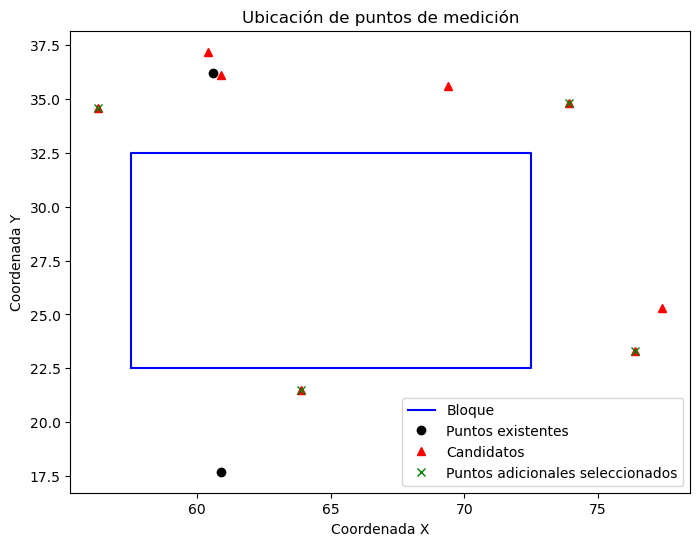

In [27]:
from itertools import combinations
import numpy as np
import math
import matplotlib.pyplot as plt

def variogram(h):
    """Función de variograma dada en el documento"""
    if abs(h) <= 40:
        return 0.18 * abs(h) + 0.01  # Agregar una pequeña constante para estabilizar
    else:
        return 0.18 * 40

def dist(p1, p2):
    """Calcula la distancia euclidiana entre dos puntos en 2D"""
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def compute_kriging_var(X, V, variogram):
    """Función para calcular la varianza de kriging"""
    n = len(X)
    yvi = [1/abs(sum([x[0]-v[0] for v in V])) * sum([variogram(dist(x, v)) for v in V]) for x in X]
    
    gamma = np.zeros((n, n))
    gamma = [[variogram(dist(xi, xj)) for xj in X] for xi in X]
    rhs = np.ones(n)
    
    # Usando numpy.linalg.solve con la opción 'lstsq' para manejar la posible singularidad
    try:
        weights = np.linalg.solve(gamma, rhs)
    except np.linalg.LinAlgError:
        weights = np.linalg.lstsq(gamma, rhs, rcond=None)[0]  # Solución de mínimos cuadrados

    kriging_var = sum([w*yvi[i] for i,w in enumerate(weights)])
    
    return kriging_var

def sequential_exchanges_combinations(X, candidates, n, V):
    """Algoritmo de Intercambios Secuenciales Óptimos con Combinaciones"""
    best_combo = None
    min_var = float('inf')
    
    for combo in combinations(candidates, n):
        X_temp = X.copy() + list(combo)
        var_temp = compute_kriging_var(X_temp, V, variogram)
        if var_temp < min_var:
            min_var = var_temp
            best_combo = combo
    
    return best_combo

# Datos del ejemplo numérico
X = [(60.6, 36.2), (60.9, 17.7)]  # Puntos existentes
candidates = [(60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3), 
              (63.9, 21.5), (77.4, 25.3), (73.9, 34.8), (69.4, 35.6)]  # Candidatos
n = 4  # Número de puntos adicionales a seleccionar
V = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5)]  # Bloque

# Ejecutar el algoritmo de Intercambios Secuenciales Óptimos con Combinaciones
best_combo = sequential_exchanges_combinations(X, candidates, n, V)
print(f"El conjunto óptimo de puntos adicionales es: {best_combo}")

# Calcular la varianza de kriging óptima
min_var = compute_kriging_var(X + list(best_combo), V, variogram)
print(f"La varianza de kriging óptima es: {min_var}")

# Visualización gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el bloque V
x_vertices = [V[0][0], V[1][0], V[1][0], V[2][0], V[2][0], V[3][0], V[3][0], V[0][0], V[0][0]]
y_vertices = [V[0][1], V[0][1], V[1][1], V[1][1], V[2][1], V[2][1], V[3][1], V[3][1], V[0][1]]
ax.plot(x_vertices, y_vertices, 'b-', label='Bloque')

# Graficar los puntos existentes
x_existing, y_existing = zip(*X)
ax.plot(x_existing, y_existing, 'ko', label='Puntos existentes')

# Graficar los candidatos
x_candidates, y_candidates = zip(*candidates)
ax.plot(x_candidates, y_candidates, 'r^', label='Candidatos')

# Graficar los puntos adicionales seleccionados
x_selected, y_selected = zip(*best_combo)
ax.plot(x_selected, y_selected, 'gx', label='Puntos adicionales seleccionados')

ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Ubicación de puntos de medición')
ax.legend()
plt.show()